In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.colors import ListedColormap
import seaborn as sns
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

import os
import math
from scipy.stats import norm
from scipy.integrate import trapz
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sys
from pathlib import Path

In [4]:
sys.path.append(str(Path().resolve().parent))
from path_manager import TRAIN_DATA_NB, VEL_DATA_DIR, PLOT_DIR

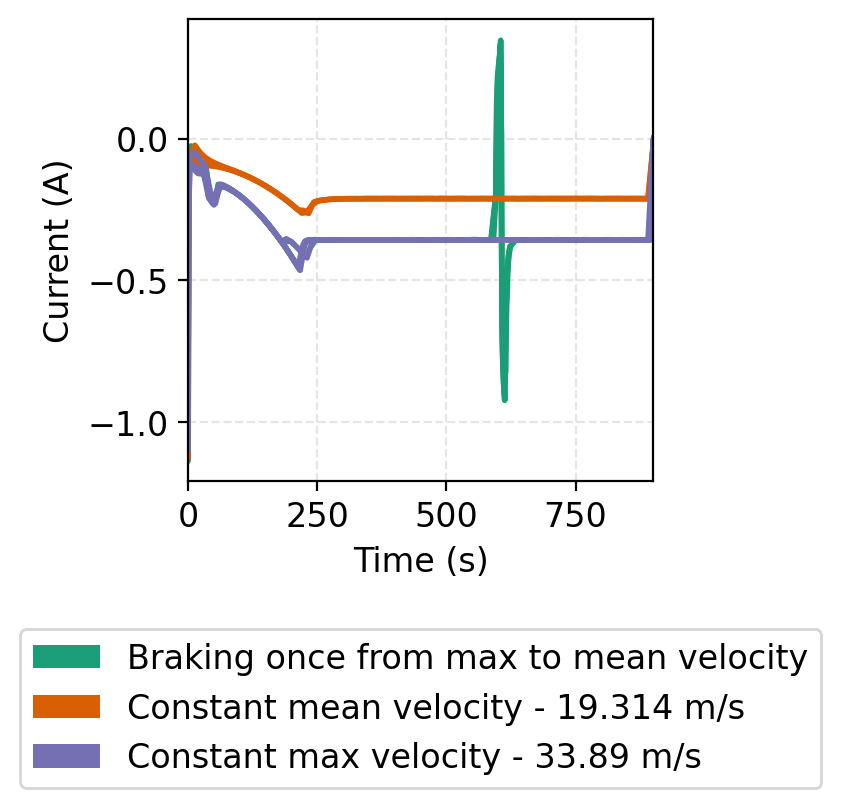

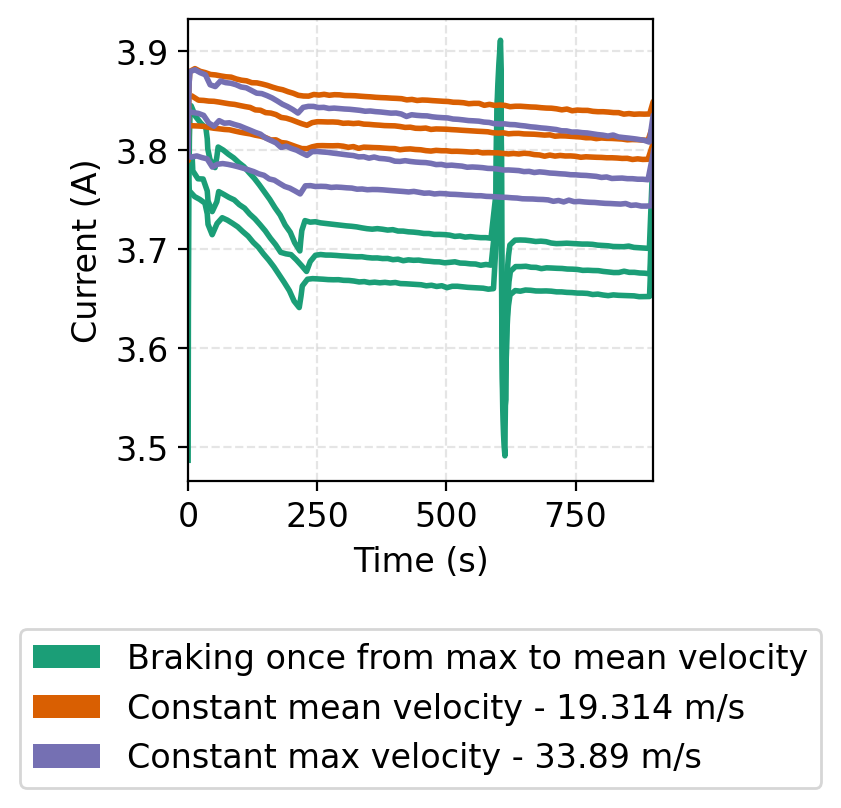

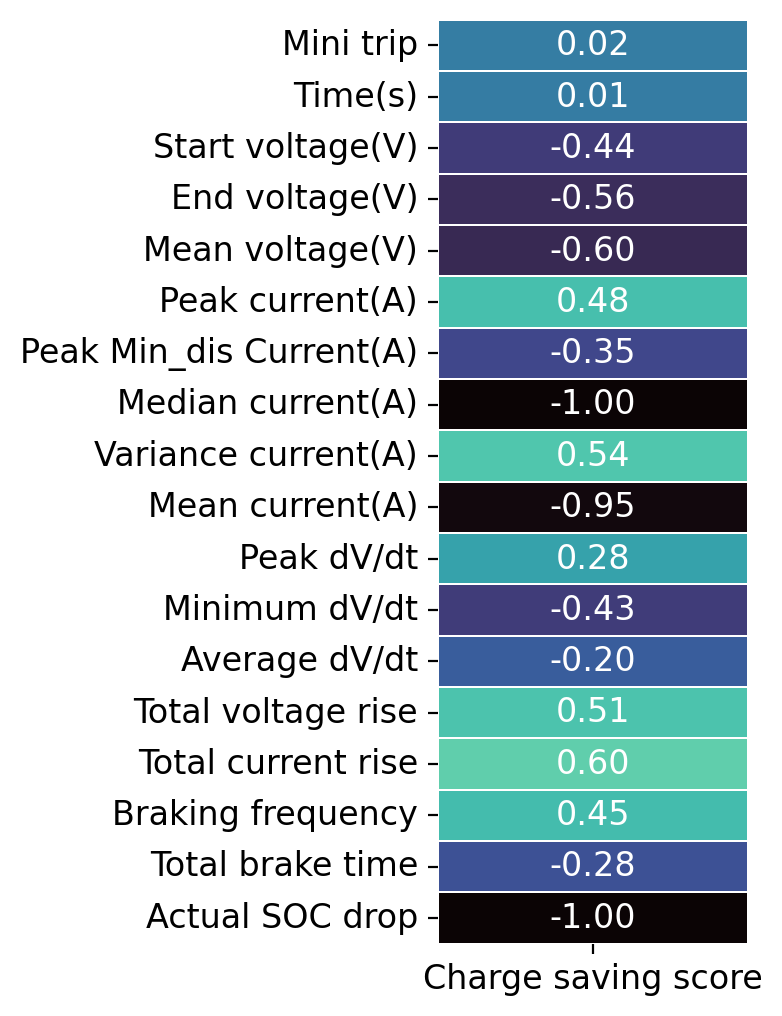

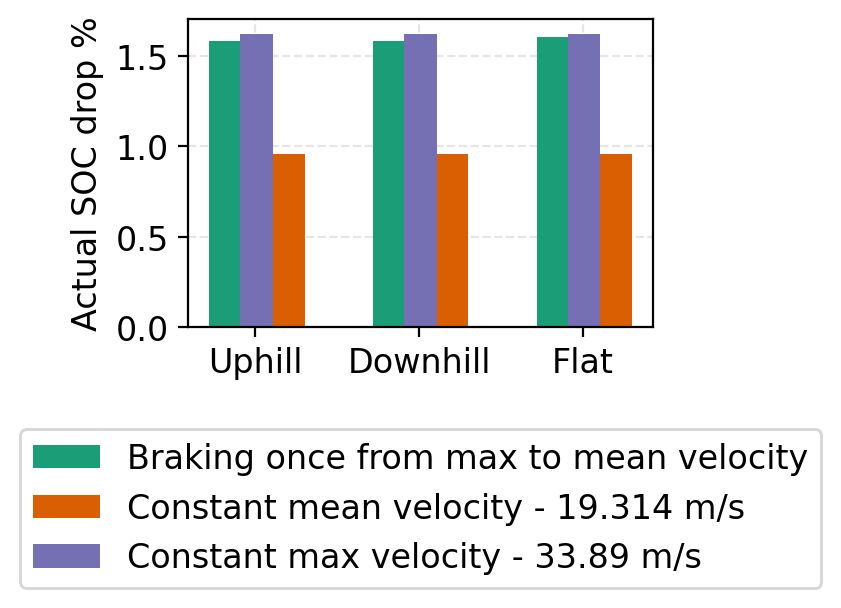

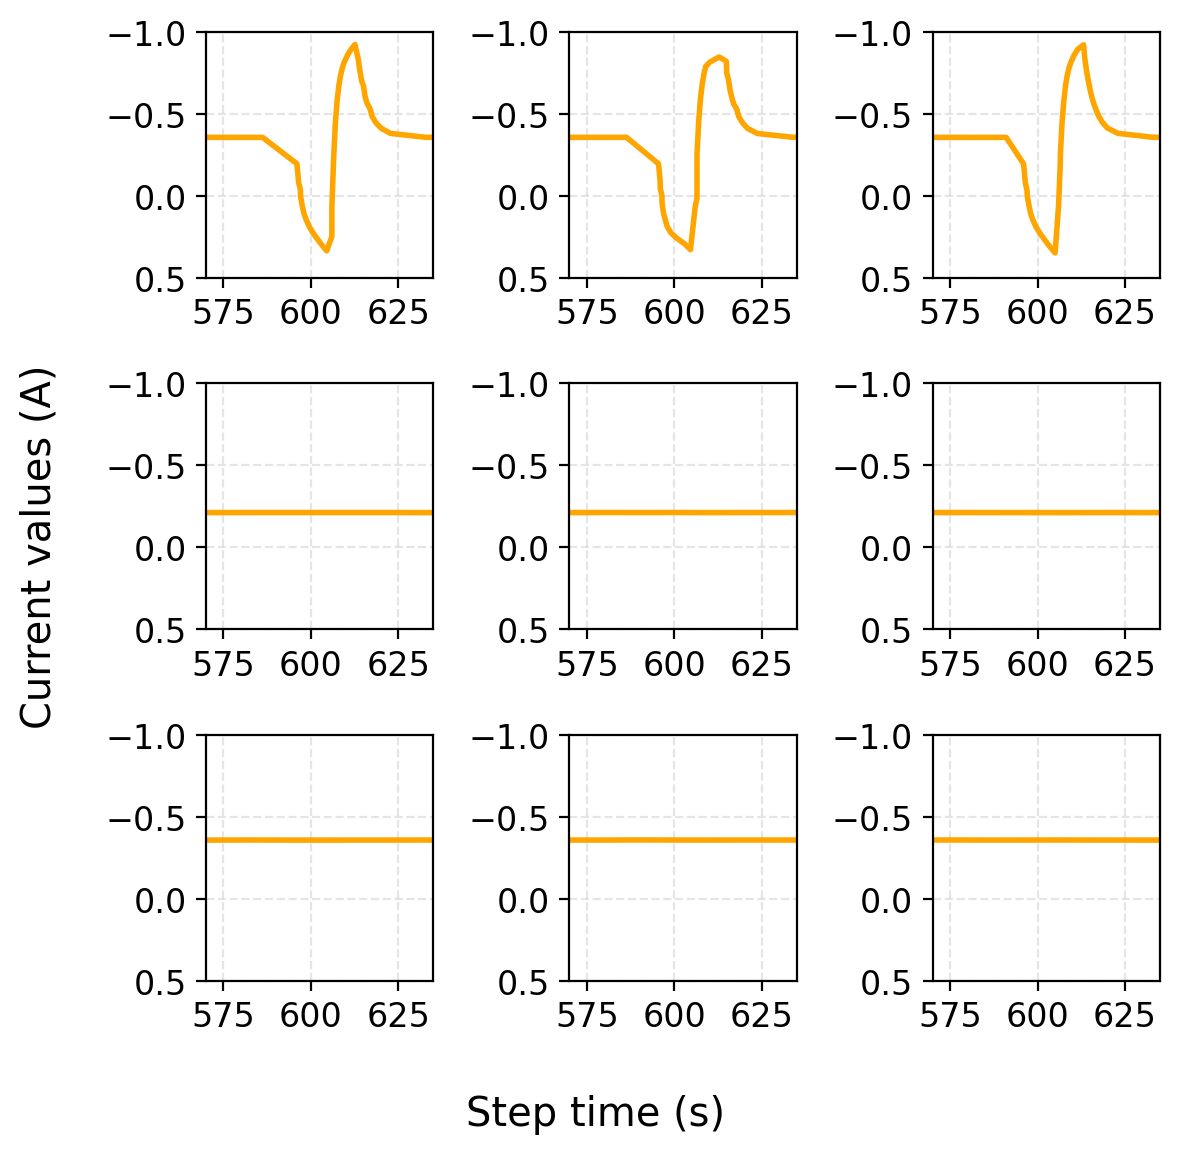

/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_3573/3217211228.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data1['Classification'].iloc[mt]= 'def_Up'
/var/folders/bv/5yzv5x3d5sb44fl8wn3sdr540000gn/T/ipykernel_3573/3217211

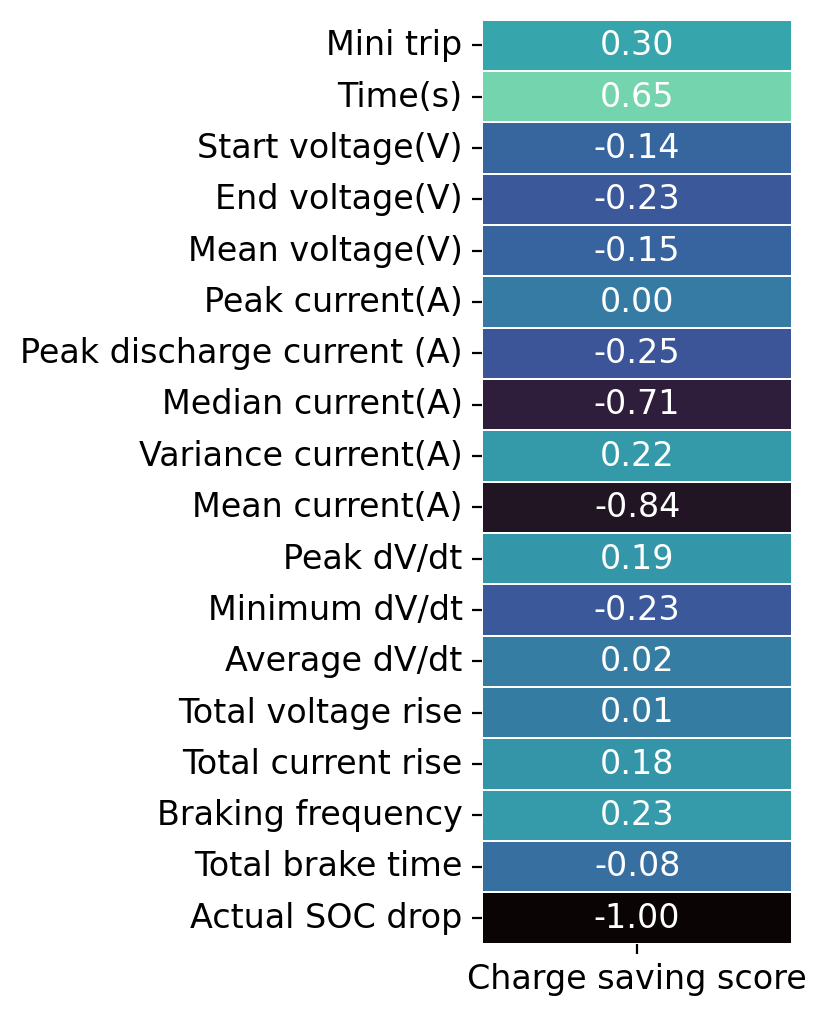

In [5]:
%run {TRAIN_DATA_NB}

In [6]:
VEL_TRAIN_A1 = VEL_DATA_DIR / 'train' / 'assertive_batch1'
VEL_TRAIN_A2 = VEL_DATA_DIR / 'train' / 'assertive_batch2'
VEL_TRAIN_D1 = VEL_DATA_DIR / 'train' / 'defensive_batch1'
VEL_TRAIN_D2 = VEL_DATA_DIR / 'train' / 'defensive_batch2'

VEL_REF = VEL_DATA_DIR / 'reference'
VEL_TEST = VEL_DATA_DIR / 'test'

In [7]:
vel_def_11= pd.read_excel(VEL_TRAIN_D1 / 'speed_DR_75188.xlsx')
vel_def_12= pd.read_excel(VEL_TRAIN_D1 / 'speed_DR_75053.xlsx')
vel_def_13= pd.read_excel(VEL_TRAIN_D1 / 'speed_DR_74866.xlsx')
vel_def_14= pd.read_excel(VEL_TRAIN_D1 / 'speed_DR_74789.xlsx')
vel_def_21= pd.read_excel(VEL_TRAIN_D2 / 'speed_DR_4716.xlsx')
vel_def_22= pd.read_excel(VEL_TRAIN_D2 / 'speed_DR_74705.xlsx')
vel_def_23= pd.read_excel(VEL_TRAIN_D2 / 'speed_DR_4839.xlsx')
vel_def_24= pd.read_excel(VEL_TRAIN_D2 / 'speed_DR_4840.xlsx')
##vel_asser_11= pd.read_excel(r'drivecycles/asser1/speed_DR_74428.xlsx')
vel_asser_11= pd.read_excel(VEL_TRAIN_A1 / 'speed_DR_14634.xlsx')
vel_asser_12= pd.read_excel(VEL_TRAIN_A1 / 'speed_DR_74517.xlsx')
vel_asser_13= pd.read_excel(VEL_TRAIN_A1 / 'speed_DR_74594.xlsx')
vel_asser_14= pd.read_excel(VEL_TRAIN_A1 / 'speed_DR_74670.xlsx')
vel_asser_21= pd.read_excel(VEL_TRAIN_A2 / 'speed_DR_74765.xlsx')
vel_asser_22= pd.read_excel(VEL_TRAIN_A2 / 'speed_DR_4832.xlsx')
vel_asser_23= pd.read_excel(VEL_TRAIN_A2 / 'speed_DR_74674.xlsx')
vel_asser_24= pd.read_excel(VEL_TRAIN_A2 / 'speed_DR_74389.xlsx')

vel_brk_max= pd.read_excel(VEL_REF / 'brake_once.xlsx')
vel_cons_max= pd.read_excel(VEL_REF / 'cons_max_vel.xlsx')
vel_cons_mean= pd.read_excel(VEL_REF / 'cons_mean_vel.xlsx')

In [8]:
vel_list=[]
vel_list.extend([vel_def_11, vel_def_12, vel_def_13, vel_def_14, 
                 vel_def_11, vel_def_12, vel_def_13, vel_def_14, 
                 vel_def_11, vel_def_12, vel_def_13, vel_def_14,
                 vel_def_21, vel_def_22, vel_def_23, vel_def_24,
                 vel_def_21, vel_def_22, vel_def_23, vel_def_24, 
                 vel_def_21, vel_def_22, vel_def_23, vel_def_24, 
                 vel_asser_11, vel_asser_12, vel_asser_13, vel_asser_14, 
                 vel_asser_11, vel_asser_12, vel_asser_13, vel_asser_14, 
                 vel_asser_11, vel_asser_12, vel_asser_13, vel_asser_14, 
                 vel_asser_21, vel_asser_22, vel_asser_23, vel_asser_24, 
                 vel_asser_21, vel_asser_22, vel_asser_23, vel_asser_24, 
                 vel_asser_21, vel_asser_22, vel_asser_23, vel_asser_24, 
                 vel_def_11, vel_def_12, vel_def_13, vel_def_14, 
                 vel_def_11, vel_def_12, vel_def_13, vel_def_14, 
                 vel_def_11, vel_def_12, vel_def_13, vel_def_14,
                 vel_def_21, vel_def_22, vel_def_23, vel_def_24,
                 vel_def_21, vel_def_22, vel_def_23, vel_def_24, 
                 vel_def_21, vel_def_22, vel_def_23, vel_def_24, 
                 vel_asser_11, vel_asser_12, vel_asser_13, vel_asser_14, 
                 vel_asser_11, vel_asser_12, vel_asser_13, vel_asser_14, 
                 vel_asser_11, vel_asser_12, vel_asser_13, vel_asser_14, 
                 vel_asser_21, vel_asser_22, vel_asser_23, vel_asser_24, 
                 vel_asser_21, vel_asser_22, vel_asser_23, vel_asser_24, 
                 vel_asser_21, vel_asser_22, vel_asser_23, vel_asser_24
                ])

In [9]:
vel_dict={}
for v_d in range (1,97):
    vel_dict[v_d]= vel_list[v_d-1]

vel_info= pd.DataFrame({'Mini_trip': range(1, 97)})
vel_info['SOC_drop (%)'] = info_data_2['SOC_drop (%)']

In [10]:
def find_vels(df):
    st=[]
    end=[]
    t=[]
    df['Velocity_Diff'] = df['speed'].diff()
    i=1
    time1=0
    while i<len(df):
        if ((df['Velocity_Diff'].iloc[i]) >0 ) and ((df['Velocity_Diff'].iloc[i-1]) <0):
            start_index = i-1
            start_velocity = df['speed'].iloc[start_index]
            st.append(start_velocity)
            time1= df['time'].iloc[start_index]

        if (df['Velocity_Diff'].iloc[i] < 0 ) and (df['Velocity_Diff'].iloc[i-1] > 0) and time1!=0:
            ##end_index=start_index+ i-1
            end_velocity = df['speed'].iloc[i-1]
            end.append(end_velocity)
            time2 = df['time'].iloc[i-1]
            time_taken= time2-time1
            t.append(time_taken)
        i=i+1
    return st, end, t

In [11]:
st_arr=[]
end_arr=[]
key_arr=[]
time_arr=[]
for k in vel_dict.keys():
    st_vel, end_vel, time_t = find_vels(vel_dict[k])
    st_arr.append(st_vel)
    end_arr.append(end_vel)
    time_arr.append(time_t)
    key_arr.append(k)

In [12]:
dict_vel_dec={}
for z in range (96):
    if (len(st_arr[z]) != len(end_arr[z])):
        num= min(len(st_arr[z]), len(end_arr[z]))
        st_arr[z] = st_arr[z][:num]
        end_arr[z] = end_arr[z][:num]
    dict_vel_dec[z+1] = {'Start Velocity': st_arr[z],
                        'End Velocity': end_arr[z],
                        'Time taken': time_arr[z]}
    

print((dict_vel_dec))

{1: {'Start Velocity': [21.38888888888889, 13.19444444444444], 'End Velocity': [22.1031746031746, 23.84920634920635], 'Time taken': [51.428571428571445, 137.1428571428571]}, 2: {'Start Velocity': [21.94444444444445], 'End Velocity': [29.23015873015873], 'Time taken': [291.42857142857144]}, 3: {'Start Velocity': [22.34126984126984, 19.36507936507937], 'End Velocity': [23.05555555555556, 24.58333333333334], 'Time taken': [51.42857142857139, 239.99999999999994]}, 4: {'Start Velocity': [22.32142857142857, 21.78571428571428], 'End Velocity': [24.40476190476191, 29.44444444444445], 'Time taken': [51.42857142857139, 68.57142857142856]}, 5: {'Start Velocity': [21.38888888888889, 13.19444444444444], 'End Velocity': [22.1031746031746, 23.84920634920635], 'Time taken': [51.428571428571445, 137.1428571428571]}, 6: {'Start Velocity': [21.94444444444445], 'End Velocity': [29.23015873015873], 'Time taken': [291.42857142857144]}, 7: {'Start Velocity': [22.34126984126984, 19.36507936507937], 'End Veloc

In [13]:
def find_vel_drops(df):
    dec_arr=[]
    df_2= df['Start Velocity']
    for i in range (len(df_2)):
        diff_vel= -(df['Start Velocity'][i])+(df['End Velocity'][i])
        time = df['Time taken'][i]
        deceleration = diff_vel/time
        dec_arr.append(deceleration)
    return dec_arr

In [14]:
dec_def_arr=[]
dec_asser_arr=[]
for keyy in dict_vel_dec.keys():
    dec_arr = find_vel_drops (dict_vel_dec[keyy])
    if keyy>0 and keyy<25:
        dec_def_arr.append(dec_arr)
    if keyy>24 and keyy<49:
        dec_asser_arr.append(dec_arr)
    if keyy> 48 and keyy<73:
        dec_def_arr.append(dec_arr)
    if keyy>72 and keyy<96:
        dec_asser_arr.append(dec_arr)
dec_def = [item for sublist in dec_def_arr for item in sublist]
dec_asser = [item1 for sublist1 in dec_asser_arr for item1 in sublist1]

data= np.array(dec_asser)
data11= np.array(dec_def)

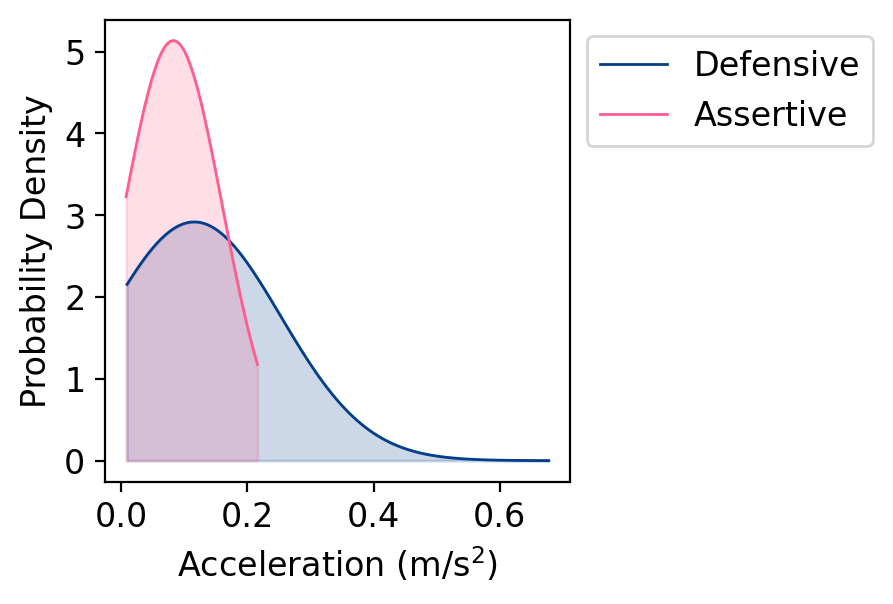

In [15]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (3, 3)


mu, std = norm.fit(data)
xmin, xmax = min(data), max(data)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
mu1, std1 = norm.fit(data11)
xmin1, xmax1 = min(data11), max(data11)
x1 = np.linspace(xmin1, xmax1, 100)
p1 = norm.pdf(x1, mu1, std1)

plt.plot(x, p, color='#023e8a', linewidth=1, label= 'Defensive')
plt.fill_between(x, p, alpha=0.2, color='#023e8a')
plt.plot(x1, p1, color='#ff5d8f', linewidth=1 , label ='Assertive')
plt.fill_between(x1, p1, alpha=0.2, color='#ff5d8f')
plt.ylabel('Probability Density')
plt.xlabel('Acceleration (m/s$^2$)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [16]:
def find_velsqr_drops(df):
    sqr_diff_arr=[]
    df_2= df['Start Velocity']
    for i in range (len(df_2)):
        diff_vel_sqr= ((df['Start Velocity'][i])*(df['Start Velocity'][i]))-((df['End Velocity'][i])*(df['End Velocity'][i]))
        time = df['Time taken'][i]
        sqr_diff = diff_vel_sqr
        sqr_diff_arr.append(sqr_diff)
    return sqr_diff_arr

In [17]:
sqr_def_arr=[]
sqr_asser_arr=[]
for keyy in dict_vel_dec.keys():
    sqr_arr = find_velsqr_drops(dict_vel_dec[keyy])
    if keyy>0 and keyy<25:
        sqr_def_arr.append(sqr_arr)
    if keyy>24 and keyy<49:
        sqr_asser_arr.append(sqr_arr)
    if keyy> 48 and keyy<73:
        sqr_def_arr.append(sqr_arr)
    if keyy>72 and keyy<96:
        sqr_asser_arr.append(sqr_arr)
sqr_def = [item for sublist in sqr_def_arr for item in sublist]
sqr_asser = [item1 for sublist1 in sqr_asser_arr for item1 in sublist1]
data= np.array(sqr_asser)
data11= np.array(sqr_def)

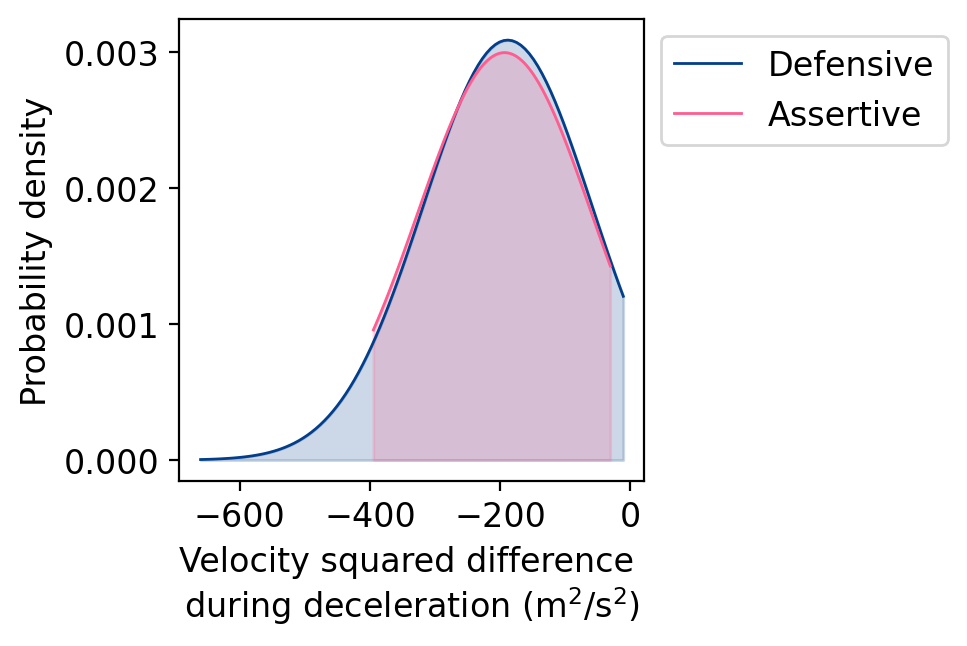

In [18]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (3, 3)

mu, std = norm.fit(data)
xmin, xmax = min(data), max(data)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
mu1, std1 = norm.fit(data11)
xmin1, xmax1 = min(data11), max(data11)
x1 = np.linspace(xmin1, xmax1, 100)
p1 = norm.pdf(x1, mu1, std1)

plt.plot(x, p, color='#023e8a', linewidth=1, label= 'Defensive')
plt.fill_between(x, p, alpha=0.2,color='#023e8a')
plt.plot(x1, p1, color='#ff5d8f', linewidth=1 , label ='Assertive')
plt.fill_between(x1, p1, alpha=0.2, color='#ff5d8f')
plt.ylabel('Probability density')
plt.xlabel('Velocity squared difference \nduring deceleration (m$^2$/s$^2$)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [19]:
def find_energy_drops(df, angle):
    sqr_diff_arr=[]
    angle_radians = math.radians(angle)
    df_2= df['Start Velocity']
    for i in range (len(df_2)):
        time = df['Time taken'][i]
        distance=((df['Start Velocity'][i])*time) + (0.5*(((df['Start Velocity'][i])- (df['End Velocity'][i]))/time)*(time**2))
        diff_vel_sqr= (0.5*(((df['Start Velocity'][i])*(df['Start Velocity'][i]))-((df['End Velocity'][i])*(df['End Velocity'][i]))))+(0.981* distance* math.sin(angle_radians))
        sqr_diff = diff_vel_sqr
        sqr_diff_arr.append(sqr_diff)
    return sqr_diff_arr

In [20]:
angle= 45
x_rads = math.radians(angle)
x=math.sin (x_rads)
x*0.981

0.693671752344003

In [21]:
ener_def_arr=[]
ener_asser_arr=[]
for keyy in dict_vel_dec.keys():
    ##Driver Type: 1 - defressive, 2- asseral
    if ((data1['Terrain'].iloc[keyy-1]) == 1) and ((data1['Driver Type'].iloc[keyy-1]) == 1) :   ##Terrain 1 for Uphill
        energy_arr = find_energy_drops(dict_vel_dec[keyy], -20)
        ener_def_arr.append(energy_arr)
    if ((data1['Terrain'].iloc[keyy-1]) == 1) and ((data1['Driver Type'].iloc[keyy-1]) == 2) :   ##Terrain 1 for Uphill
        energy_arr = find_energy_drops(dict_vel_dec[keyy], -20)
        ener_asser_arr.append(energy_arr)
    if ((data1['Terrain'].iloc[keyy-1]) == 2) and ((data1['Driver Type'].iloc[keyy-1]) == 1) :   ##Terrain 2 for Downhill
        energy_arr = find_energy_drops(dict_vel_dec[keyy], 20)
        ener_def_arr.append(energy_arr)
    if ((data1['Terrain'].iloc[keyy-1]) == 2) and ((data1['Driver Type'].iloc[keyy-1]) == 2) :   ##Terrain 2 for Downhill
        energy_arr = find_energy_drops(dict_vel_dec[keyy], 20)
        ener_asser_arr.append(energy_arr)
    if ((data1['Terrain'].iloc[keyy-1]) == 3) and ((data1['Driver Type'].iloc[keyy-1]) == 1) :   ##Terrain 3 for Flat
        energy_arr = find_energy_drops(dict_vel_dec[keyy], 0)
        ener_def_arr.append(energy_arr)
    if ((data1['Terrain'].iloc[keyy-1]) == 3) and ((data1['Driver Type'].iloc[keyy-1]) == 2) :   ##Terrain 3 for Flat
        energy_arr = find_energy_drops(dict_vel_dec[keyy], 0)
        ener_asser_arr.append(energy_arr)

en_def = [item for sublist in ener_def_arr for item in sublist]
en_asser = [item1 for sublist1 in ener_asser_arr for item1 in sublist1]
data= np.array(en_asser)
data11= np.array(en_def)

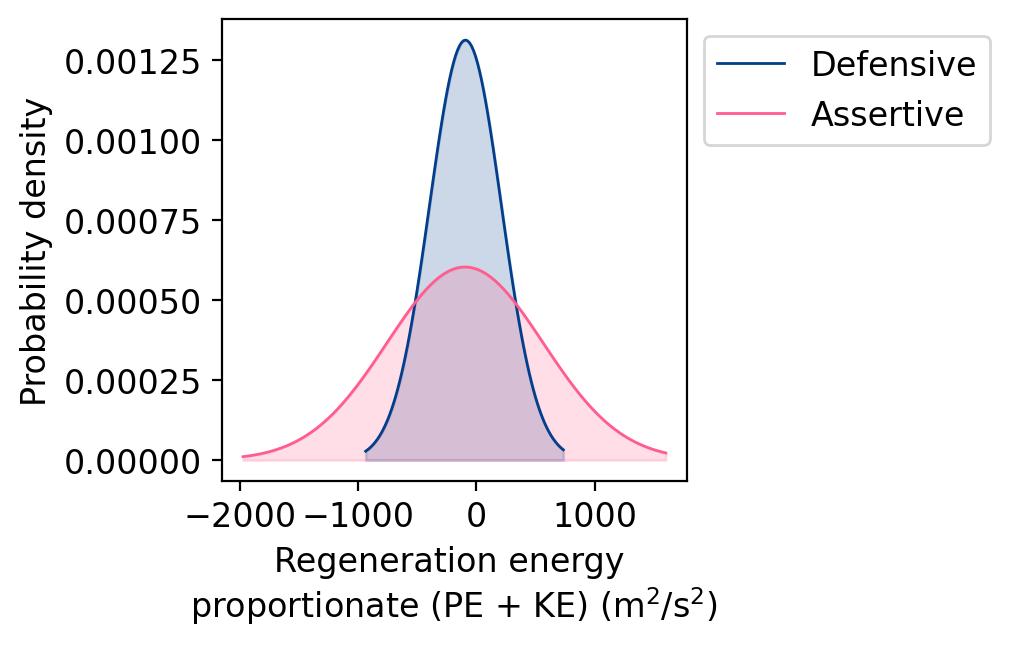

In [22]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (3, 3)

mu, std = norm.fit(data)
xmin, xmax = min(data), max(data)
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
mu1, std1 = norm.fit(data11)
xmin1, xmax1 = min(data11), max(data11)
x1 = np.linspace(xmin1, xmax1, 100)
p1 = norm.pdf(x1, mu1, std1)

plt.plot(x, p, color='#023e8a', linewidth=1, label= 'Defensive')
plt.fill_between(x, p, alpha=0.2, color='#023e8a')
plt.plot(x1, p1, color='#ff5d8f', linewidth=1 , label ='Assertive')
plt.fill_between(x1, p1, alpha=0.2, color='#ff5d8f')
plt.ylabel('Probability density')
plt.xlabel('Regeneration energy \nproportionate (PE + KE) (m$^2$/s$^2$)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [23]:
# np.sum(data)

In [24]:
vel_def_11= pd.read_excel(VEL_TRAIN_D1 / 'speed_DR_75188.xlsx')
vel_def_12= pd.read_excel(VEL_TRAIN_D1 / 'speed_DR_75053.xlsx')
vel_def_13= pd.read_excel(VEL_TRAIN_D1 / 'speed_DR_74866.xlsx')
vel_def_14= pd.read_excel(VEL_TRAIN_D1 / 'speed_DR_74789.xlsx')
vel_def_21= pd.read_excel(VEL_TRAIN_D2 / 'speed_DR_4716.xlsx')
vel_def_22= pd.read_excel(VEL_TRAIN_D2 / 'speed_DR_74705.xlsx')
vel_def_23= pd.read_excel(VEL_TRAIN_D2 / 'speed_DR_4839.xlsx')
vel_def_24= pd.read_excel(VEL_TRAIN_D2 / 'speed_DR_4840.xlsx')
##vel_asser_11= pd.read_excel(r'drivecycles/asser1/speed_DR_74428.xlsx')
vel_asser_11= pd.read_excel(VEL_TRAIN_A1 / 'speed_DR_14634.xlsx')
vel_asser_12= pd.read_excel(VEL_TRAIN_A1 / 'speed_DR_74517.xlsx')
vel_asser_13= pd.read_excel(VEL_TRAIN_A1 / 'speed_DR_74594.xlsx')
vel_asser_14= pd.read_excel(VEL_TRAIN_A1 / 'speed_DR_74670.xlsx')
vel_asser_21= pd.read_excel(VEL_TRAIN_A2 / 'speed_DR_74765.xlsx')
vel_asser_22= pd.read_excel(VEL_TRAIN_A2 / 'speed_DR_4832.xlsx')
vel_asser_23= pd.read_excel(VEL_TRAIN_A2 / 'speed_DR_74674.xlsx')
vel_asser_24= pd.read_excel(VEL_TRAIN_A2 / 'speed_DR_74389.xlsx')

vel_brk_max= pd.read_excel(VEL_REF / 'brake_once.xlsx')
vel_cons_max= pd.read_excel(VEL_REF / 'cons_max_vel.xlsx')
vel_cons_mean= pd.read_excel(VEL_REF / 'cons_mean_vel.xlsx')

vel_test_1= pd.read_excel(VEL_TEST / 'test_1_def.xlsx')
vel_test_2= pd.read_excel(VEL_TEST / 'test_2_asser.xlsx')
vel_test_3= pd.read_excel(VEL_TEST / 'test_3_def.xlsx')
vel_test_4= pd.read_excel(VEL_TEST /'test_4_asser.xlsx')

In [25]:
vel_list=[]
vel_list.extend([vel_def_11, vel_def_12, vel_def_13, vel_def_14, 
                 vel_def_21, vel_def_22, vel_def_23, vel_def_24,
                 vel_asser_11, vel_asser_12, vel_asser_13, vel_asser_14,   ##vel_asser_11
                 vel_asser_21, vel_asser_22, vel_asser_23, vel_asser_24, 
                 ##vel_new_1, vel_new_2, vel_new_3
                ])

vel_cb_list=[]
vel_cb_list.extend([vel_brk_max, vel_cons_max, vel_cons_mean])

vel_test_list=[]
vel_test_list.extend([vel_test_1, vel_test_2, vel_test_3, vel_test_4])

In [26]:
def cut_time_vel(df, s, t):
    df_2 = df[df['time'] >= s]
    limited_data = df_2[df_2['time'] <= t]
    return limited_data

In [27]:
vel_dict={}
for v_d in range (1,17):
    vel_dict[v_d]= vel_list[v_d-1]

vel_cb_dict={}
for vel_cb_key in range (1,4):
    vel_cb_dict[vel_cb_key]= vel_cb_list[vel_cb_key-1]

vel_test_dict={}
for vel_test_key in range (1,5):
    vel_test_dict[vel_test_key]= vel_test_list[vel_test_key-1]

In [28]:
def vel_cut(dict_f, start, end):
    cut_dict={}
    data_list=[]
    for key in dict_f.keys():
        datafr= cut_time_vel(dict_f[key], start, end)
        data_list.append(datafr)
    cut_dict={f'{i+1}': dataf for i, dataf in enumerate(data_list)}
    return cut_dict

In [29]:
def find_acc(df):
    # Calculate the difference between consecutive velocity values
    total_acc=0
    df['Velocity_Diff'] = df['speed'].diff()
    df['Time_Diff'] = df['time'].diff()
    i=1
    # Find the index where the velocity starts to drop (first negative difference)
    while i<len(df):
        if ((df['Velocity_Diff'].iloc[i])>0 ):
            acc= (df['Velocity_Diff'].iloc[i])/(df['Time_Diff'].iloc[i])
            total_acc=total_acc+acc
        i=i+1
    return total_acc

In [30]:
def find_dec(df):
    # Calculate the difference between consecutive velocity values
    total_dec=0
    df['Velocity_Diff'] = df['speed'].diff()
    df['Time_Diff'] = df['time'].diff()
    i=1
    brake=0
    # Find the index where the velocity starts to drop (first negative difference)
    while i<len(df):
        if ((df['Velocity_Diff'].iloc[i])<0 ):
            dec= (df['Velocity_Diff'].iloc[i])/(df['Time_Diff'].iloc[i])
            total_dec= (total_dec+dec)
        if ((df['Velocity_Diff'].iloc[i])<0 and (df['Velocity_Diff'].iloc[i-1])>=0):
            brake= brake+1
        i=i+1
        pos_total_dec= -total_dec
    return pos_total_dec, brake

In [31]:
def find_distance(df):
    distance = trapz(df['speed'], df['time'])
    return distance

In [32]:
def avg_vel(df):
    vel_arr= np.array(df['speed'])
    avg = np.mean(vel_arr)
    return avg

In [33]:
def total_time(df):
    tot_time= df['time'].iloc[-1]
    return tot_time

In [34]:
def feat_ext_vel(vel_dict):
    acc_arr=[]
    dec_arr=[]
    br_arr=[]
    dist_arr=[]
    vel_avg_arr=[]
    time_arr=[]
    for key in vel_dict.keys():
        acc= find_acc(vel_dict[key])
        acc_arr.append(acc)
        dec, br= find_dec(vel_dict[key])
        dec_arr.append(dec)
        br_arr.append(br)
        dist= find_distance(vel_dict[key])
        dist_arr.append(dist)
        vel_avg= avg_vel(vel_dict[key])
        vel_avg_arr.append(vel_avg)
        tot_time= total_time(vel_dict[key])
        time_arr.append(tot_time)

    #Feature extraction
    feature_vel=pd.DataFrame()
    feature_vel['Total Acceleration']= acc_arr
    feature_vel['Total Decceleration'] = dec_arr
    feature_vel['Number of brakes'] = br_arr
    feature_vel['Total Distance'] = dist_arr
    feature_vel['Avg. Velocity'] = vel_avg_arr
    ##feature_vel['Total Time'] = time_arr
    return feature_vel

feature_vel= feat_ext_vel(vel_dict)
feature_vel

,Total Acceleration,Total Decceleration,Number of brakes,Total Distance,Avg. Velocity
0,2.089120,0.890046,3,14608.775510,17.249127
1,1.847840,0.373302,2,17255.623583,20.384339
2,1.715509,0.386806,3,15733.265306,18.583254
3,2.292824,0.656250,3,16427.551020,19.446032
4,1.687191,0.295833,2,17907.677357,19.755026
5,1.782613,0.557613,3,17389.542552,19.160280
6,1.692130,0.379630,1,16642.517007,19.641270
7,1.787809,0.621142,2,16907.482993,19.925397
8,2.512963,1.197222,5,17206.112037,18.977211
9,1.962963,0.632099,6,17952.311537,19.792517


In [35]:
feature_vel_cb= feat_ext_vel(vel_cb_dict)
feature_vel_cb

,Total Acceleration,Total Decceleration,Number of brakes,Total Distance,Avg. Velocity
0,2.638673,0.793551,1,25470.726980,28.073692
1,1.845122,0.000000,0,25738.438776,28.365200
2,1.051572,0.000000,0,15117.123572,16.654014


In [36]:
feature_vel_test= feat_ext_vel(vel_test_dict)
feature_vel_test

,Total Acceleration,Total Decceleration,Number of brakes,Total Distance,Avg. Velocity
0,1.702315,0.401698,3,17666.701374,19.475964
1,1.974103,0.882378,6,18345.633764,18.941723
2,1.654938,0.293827,3,17746.772178,19.574263
3,2.384722,1.282870,6,16376.734694,19.295079


In [37]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(feature_vel)
normalized_data

array([[-0.04675861,  0.47436589, -0.54735777, -2.76862781, -3.07725479],
       [-0.77156299, -1.25744593, -1.13120607,  0.06176991,  1.31884591],
       [-1.16908122, -1.21219178, -0.54735777, -1.56615858, -1.20658154],
       [ 0.5651645 , -0.30917746, -0.54735777, -0.82372658,  0.00317986],
       [-1.25414781, -1.51707548, -1.13120607,  0.75904133,  0.43644307],
       [-0.96750201, -0.63974828, -0.54735777,  0.20497569, -0.39749323],
       [-1.23931331, -1.23624113, -1.71505436, -0.59385346,  0.27693692],
       [-0.95189488, -0.42683826, -1.13120607, -0.31051301,  0.67533134],
       [ 1.22645867,  1.50383325,  0.62033881,  0.00882491, -0.65418684],
       [-0.42573372, -0.39011774,  1.2041871 ,  0.80677074,  0.4890112 ],
       [ 0.70168825,  0.96905845,  0.62033881,  0.33712231, -0.18934035],
       [-0.01036773,  0.07328479,  1.2041871 ,  0.36117258, -0.14721165],
       [ 0.54036307,  0.5863376 ,  0.62033881,  1.13200617,  0.9611706 ],
       [ 1.13467021,  1.80690678,  0.6

In [38]:
normalized_data_cb= scaler.fit_transform(feature_vel_cb)
normalized_data_cb

array([[ 1.22474487e+00,  1.41421356e+00,  1.41421356e+00,
         6.79865359e-01,  6.80210655e-01],
       [ 3.42697713e-16, -7.07106781e-01, -7.07106781e-01,
         7.34002757e-01,  7.33666109e-01],
       [-1.22474487e+00, -7.07106781e-01, -7.07106781e-01,
        -1.41386812e+00, -1.41387676e+00]])

In [39]:
normalized_data_test= scaler.fit_transform(feature_vel_test)
normalized_data_test

array([[-0.78195791, -0.79243152, -1.        ,  0.18492977,  0.6393758 ],
       [ 0.15550332,  0.42259804,  1.        ,  1.13079377, -1.57571043],
       [-0.94537071, -1.06509822, -1.        ,  0.29648151,  1.04694791],
       [ 1.5718253 ,  1.43493169,  1.        , -1.61220506, -0.11061328]])

In [40]:
pca = PCA() ## n_components=4
reduced_data = pca.fit_transform(normalized_data)

In [41]:
loadings_pca = pca.components_
df_loadings = pd.DataFrame(loadings_pca, columns=['Total Acceleration', 'Total Deceleration', 'No. of Breaks', 'Total Dist', 'Avg Vel'])  ##, 'Time'
print("Loadings (Eigenvectors):")
print(df_loadings)

Loadings (Eigenvectors):
   Total Acceleration  Total Deceleration  No. of Breaks  Total Dist   Avg Vel
0           -0.518958           -0.512093      -0.524759   -0.396669 -0.189009
1            0.257093            0.342958       0.086249   -0.556596 -0.706431
2           -0.526721           -0.220104       0.746789    0.134698 -0.313499
3            0.550991           -0.686414       0.310907   -0.321591  0.158623
4            0.289067           -0.317065      -0.250665    0.641319 -0.584626


In [42]:
def cb_vel_loads(pc_val, df_loadings, normalized_data_cb):
    cb_arr=[]
    for k in range (3):
        t=0
        for i in range (5):   ##Number of features=5
            vals= (df_loadings.iloc[pc_val].iloc[i]) * (normalized_data_cb[k][i])
            t=t+vals
        cb_arr.append(t)
    return cb_arr   

In [43]:
def test_vel_loads(pc_val, df_loadings, normalized_data_cb):
    cb_arr=[]
    for k in range (4):
        t=0
        for i in range (5):   ##Number of features=5
            vals= (df_loadings.iloc[pc_val].iloc[i]) * (normalized_data_cb[k][i])
            t=t+vals
        cb_arr.append(t)
    return cb_arr

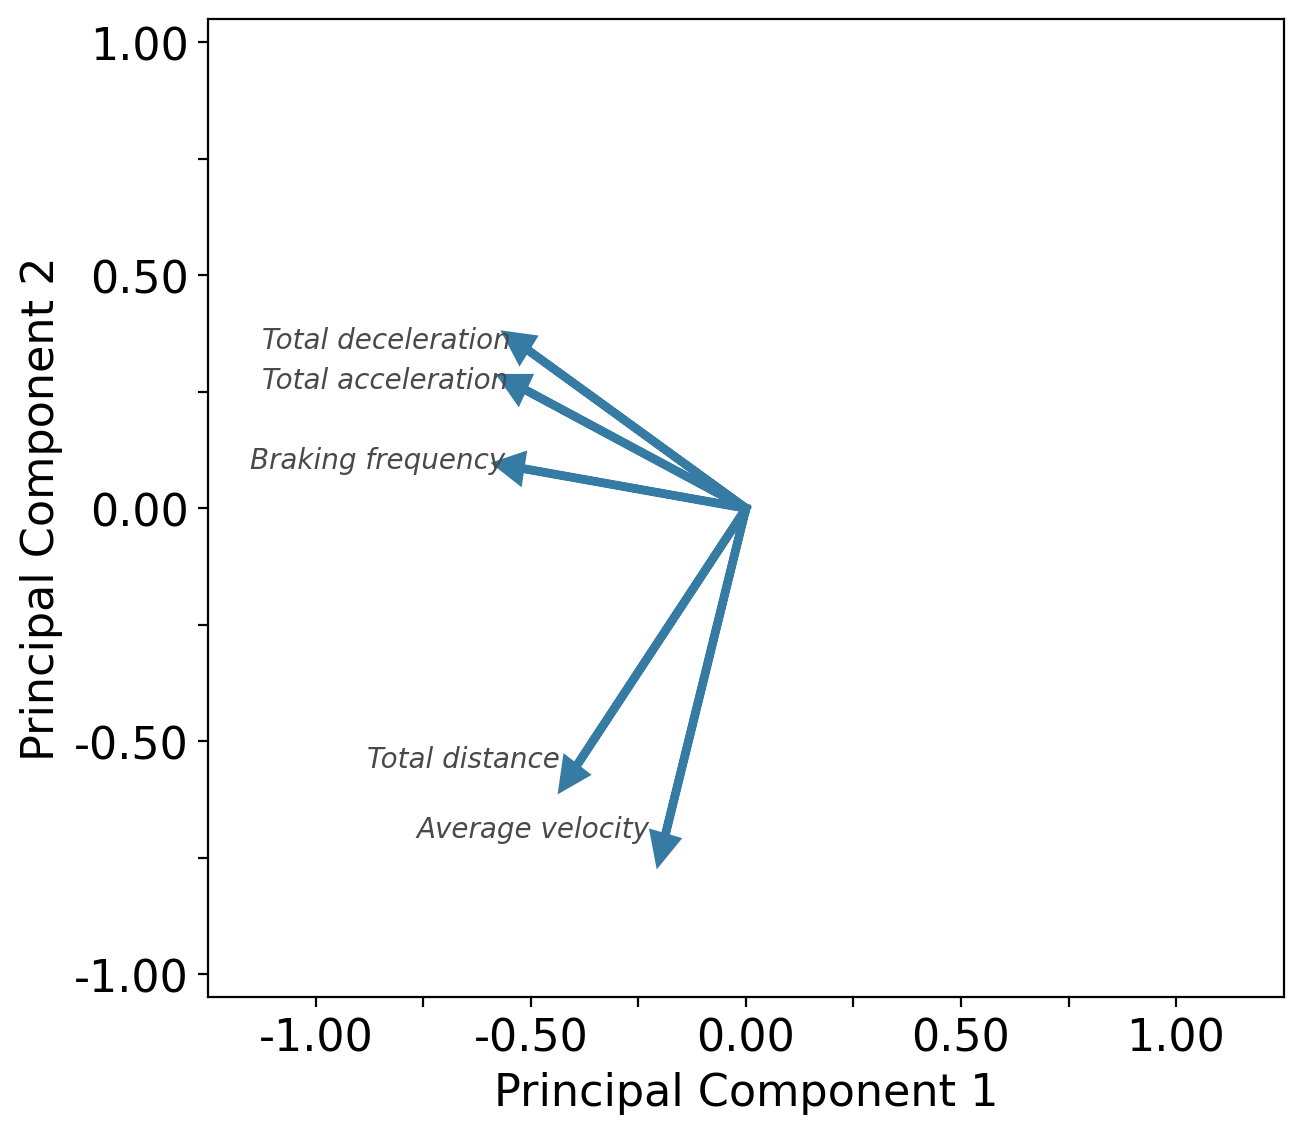

In [44]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 16
fig, ax = plt.subplots(figsize=(6, 5))
colors = sns.color_palette("mako", 1)

loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings_pca, columns=['Total acceleration', 'Total deceleration', 'Braking frequency', 'Total distance', 'Average velocity']) 

for i, feature in enumerate(df_loadings.columns):
    ax.arrow(0, 0, loadings[i, 0], loadings[i, 1], head_width=0.05, head_length=0.05, fc=colors[0], ec=colors[0], lw = 3)
    ax.text(loadings[i, 0]-0.035, loadings[i, 1], feature, color="#494949", ha='right', va='baseline', fontsize=10, weight = 'medium', fontstyle = 'italic')

ax.set_xlim(-1.05, 1.05)
ax.set_ylim(-1.05, 1.05)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
# ax.set_title('PCA Loading Plot')
ticks = np.arange(-1, 1.1, 0.25)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(['' if i % 2 != 0 else f'{tick:.2f}' for i, tick in enumerate(ticks)])
ax.set_yticklabels(['' if i % 2 != 0 else f'{tick:.2f}' for i, tick in enumerate(ticks)])

# ax.tick_params(axis='both', which='major', length=12, width=2)  # Major ticks
# ax.tick_params(axis='both', which='minor', length=6, width=2)   # Minor ticks
# for spine in ax.spines.values():
#     spine.set_linewidth(2)  # Adjust the thickness as needed
plt.tight_layout(pad = -1)
fig.savefig(PLOT_DIR / 'PCA_plot.svg', format='svg', dpi=2000,  bbox_inches='tight')
# plt.ylim(-1.6, 1.6)
plt.xlim(-1.25, 1.25)
plt.show()
plt.close()

In [45]:
explained_variance = pca.explained_variance_ratio_

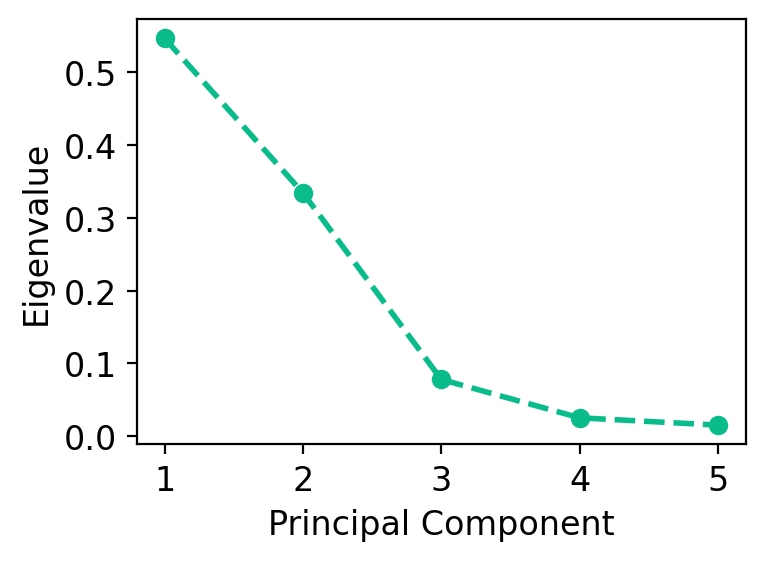

In [64]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (4, 3)

fig, ax = plt.subplots()

ax.plot(np.arange(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='#09bc8a', lw=2)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Eigenvalue')
ax.set_xticks(np.arange(1, len(explained_variance) + 1))

plt.tight_layout()
fig.savefig(PLOT_DIR / 'scree.svg', format='svg', dpi=2000, bbox_inches='tight')
plt.show()
plt.close()

In [47]:
#### reduced_data

In [48]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(normalized_data)

In [49]:
pc1_cb= cb_vel_loads(0, df_loadings, normalized_data_cb)
pc2_cb= cb_vel_loads(1, df_loadings, normalized_data_cb)

In [50]:
pc1_test= test_vel_loads(0, df_loadings, normalized_data_test)
pc2_test= test_vel_loads(1, df_loadings, normalized_data_test)

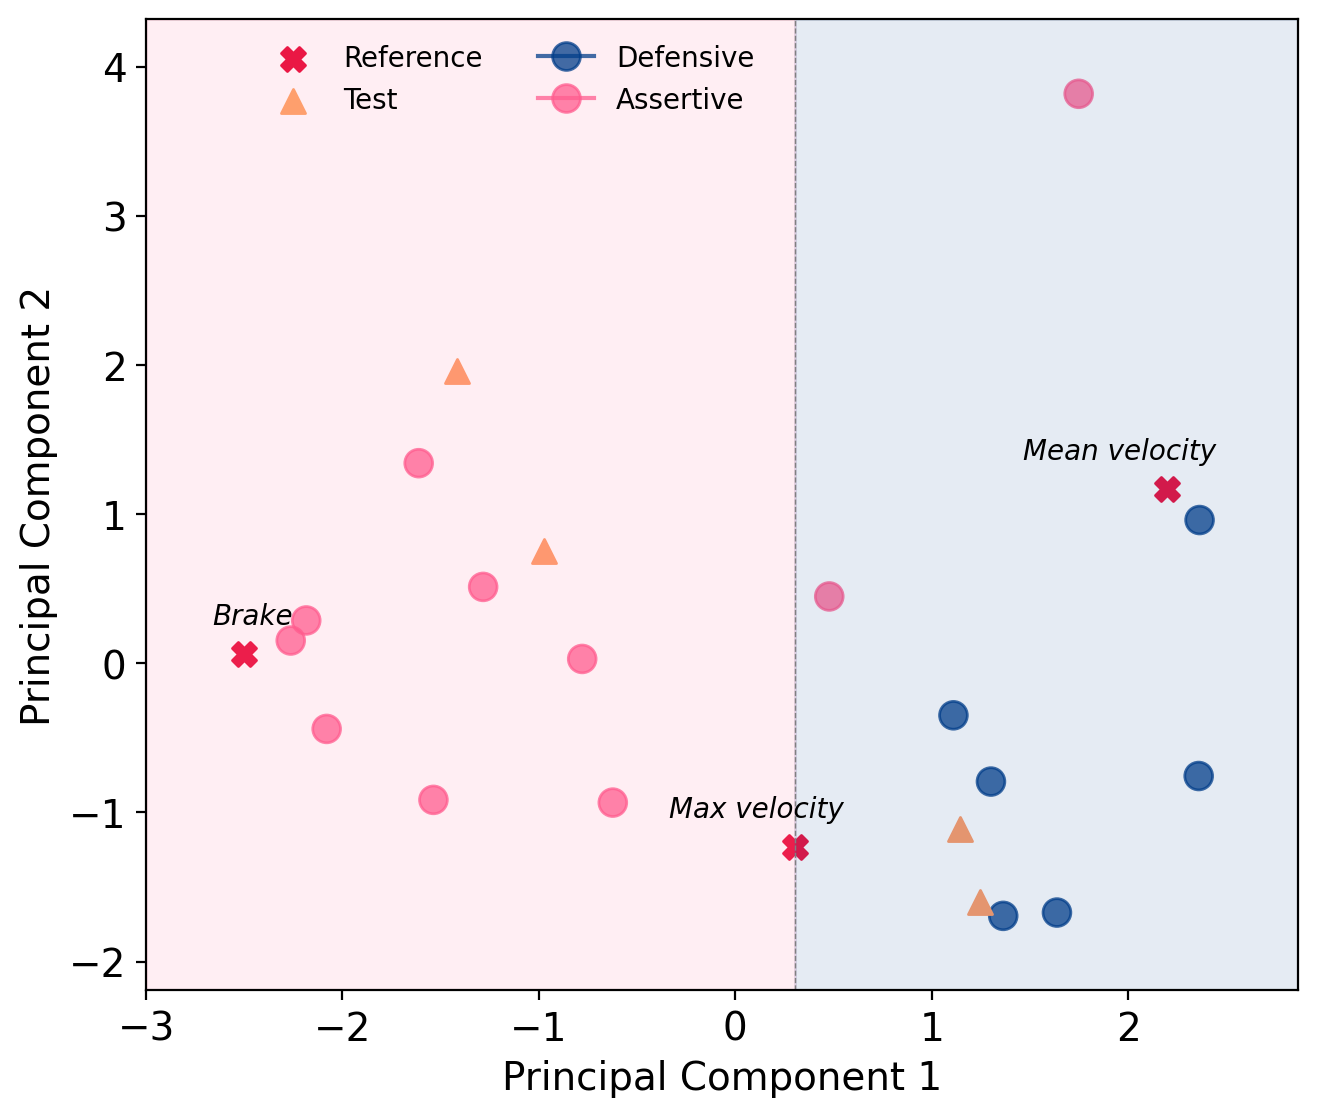

In [59]:
# Your initial setup
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (6, 5)
fig, ax = plt.subplots()

# Perform PCA and KMeans clustering
# pca = PCA(n_components=2)
# reduced_data = pca.fit_transform(normalized_data)
# kmeans = KMeans(n_clusters=2, random_state=42)
# labels = kmeans.fit_predict(normalized_data)

test_leg = ['Test1', 'Test2', 'Test3', 'Test4']
lab = ['Brake', 'Max velocity', 'Mean velocity']

colors = [ '#023e8a', '#ff5d8f'] 
cluster_scatter = ax.scatter(reduced_data[:, 0], reduced_data[:, 1], 
                           c=labels, s=100, cmap=ListedColormap(colors), 
                           alpha=0.75)

# Plot reference and test points
ref_scatter = ax.scatter(pc1_cb, pc2_cb, marker='X', color='#ea1744', 
                        label='Reference', s=75, alpha=1)
test_scatter = ax.scatter(pc1_test, pc2_test, marker='^', 
                         color=plt.cm.magma(0.8), label='Test', s=75, alpha=1)

# Get the maximum extent of all points for proper axis limits
all_x = np.concatenate([reduced_data[:, 0], pc1_cb, pc1_test])
all_y = np.concatenate([reduced_data[:, 1], pc2_cb, pc2_test])
x_min, x_max = np.min(all_x) - 0.5, np.max(all_x) + 0.5
y_min, y_max = np.min(all_y) - 0.5, np.max(all_y) + 0.5

# Set axis limits
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Identify max velocity point
max_velocity_idx = 1  # assuming it's the second point in ref_scatter
max_velocity_x = pc1_cb[max_velocity_idx]

# Draw vertical dotted line
ax.axvline(x=max_velocity_x, color='grey', linestyle='--', linewidth=0.5)

# Add shading - make sure to use the proper axis limits
ax.fill_betweenx([y_min, y_max], x_min, max_velocity_x, 
                 color='#ff5d8f', alpha=0.1)  # Light pink for Assertive
ax.fill_betweenx([y_min, y_max], max_velocity_x, x_max, 
                 color='#023e8a', alpha=0.1)  # Light blue for Defensive

# Add text labels for reference points
for m, l in enumerate(lab):
    ax.text(pc1_cb[m] + 0.25, pc2_cb[m] + 0.2, l, fontsize=10, ha='right', fontstyle ='italic')

# Create legend elements
legend_elements = [
    ref_scatter,
    test_scatter,
    plt.Line2D([0], [0], marker='o', color='#023e8a', label='Defensive', 
               markersize=10, markerfacecolor='#023e8a', alpha=0.75),
    plt.Line2D([0], [0], marker='o', color='#ff5d8f', label='Assertive', 
               markersize=10, markerfacecolor='#ff5d8f', alpha=0.75)
]

# Add legend
ax.legend(handles=legend_elements, 
         loc='upper right', 
         fontsize=10, 
         frameon=False, 
         ncol=2, 
         bbox_to_anchor=(0.55, 1.))

# Add labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

plt.tight_layout(pad = -1)
fig.savefig(PLOT_DIR / 'driver_classification_shade.svg', format='svg', dpi=2000, bbox_inches='tight')
plt.show()
plt.close()

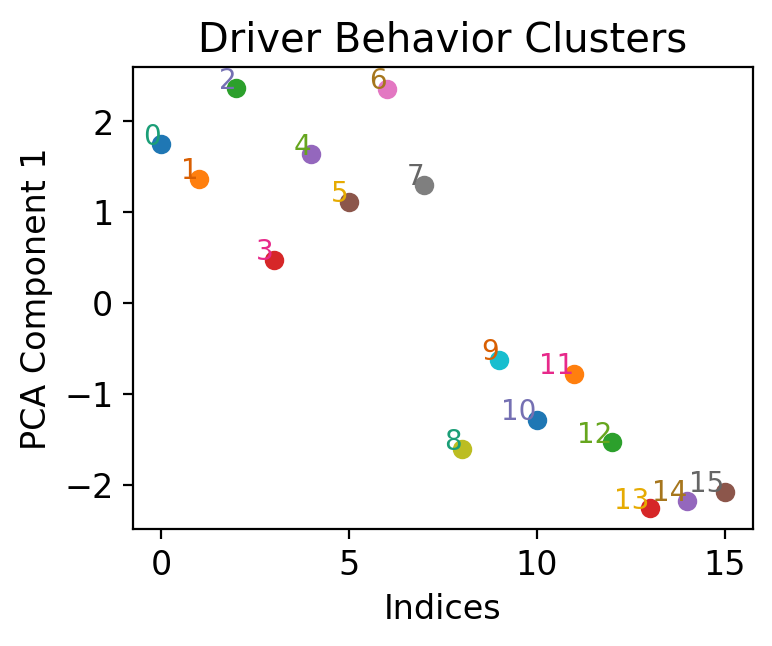

In [52]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (4, 3)
colors = sns.color_palette("Dark2", 16) 

for i in range (len(reduced_data)):
    plt.text(i, reduced_data[i][0], str(i), fontsize=10, ha='right', color = colors[i])
    plt.scatter(i, reduced_data[i][0])
plt.xlabel('Indices')
plt.ylabel('PCA Component 1')
plt.title('Driver Behavior Clusters')
plt.show()

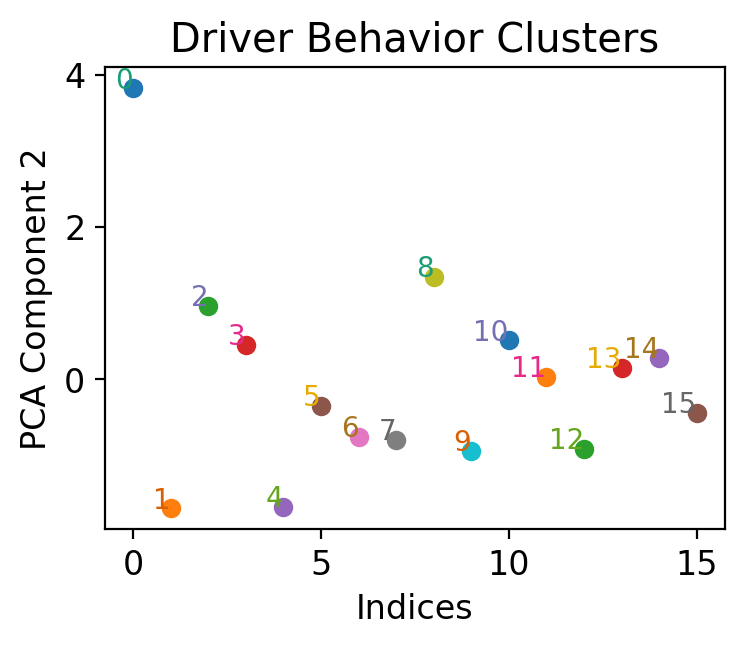

In [53]:
sns.reset_orig()
plt.rcdefaults()
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (4, 3)
colors = sns.color_palette("Dark2", 16) 

for i in range (len(reduced_data)):
    plt.text(i, reduced_data[i][1], str(i), fontsize=10, ha='right', color = colors[i])
    plt.scatter(i, reduced_data[i][1])
plt.xlabel('Indices')
plt.ylabel('PCA Component 2')
plt.title('Driver Behavior Clusters')
plt.show()

feature_vel['Total Acceleration']= acc_arr
feature_vel['Total Decceleration'] = dec_arr
feature_vel['Number of brakes'] = br_arr
feature_vel['Total Distance'] = dist_arr
feature_vel['Avg. Velocity'] = vel_avg_arr
feature_vel['Total Time'] = time_arr

In [54]:
def plot_vel(arr, y_axis_label):
    for i in range (16):
        plt.scatter(i, arr[i], label= i)  ##, c=labels
        plt.text(i, arr[i], str(i), fontsize=9, ha='right')
    plt.xlabel('Indices')
    plt.ylabel(f'{y_axis_label}')
    plt.title('Driver Behavior Clusters')
    ##plt.savefig(f'{y_axis_label} vel data.png')
    plt.show()

In [55]:
# plot_vel(acc_arr, 'Total Acceleration')
# plot_vel(dec_arr, 'Total Deceleration')
# plot_vel(br_arr, 'Total Number of Brakes')
# plot_vel(dist_arr, 'Total Distance')
# plot_vel(vel_avg_arr, 'Average Velocity')